<a href="https://colab.research.google.com/github/brindhasenthilkumar/fmml2021/blob/main/Mod3_FMML20210502_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization
#### Module Coordinator: Sahil Manoj Bhatt

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

## Binary Classification Task: Diabetes Dataset

We’ll be using ML techniques learnt uptil now to predict whether a Pima Indian Woman has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. 



# Introduction

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in **Pima Indian Women**. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
# Upload the preprocessed diabetes data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv


In [ ]:
diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')

In [ ]:
# View top 10 rows of the Diabetes dataset
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,125,33.6,0.627,50,1
1,1,85.0,66.000000,29,125,26.6,0.351,31,0
2,8,183.0,64.000000,29,125,23.3,0.672,32,1
3,1,89.0,66.000000,23,94,28.1,0.167,21,0
4,0,137.0,40.000000,35,168,43.1,2.288,33,1
5,5,116.0,74.000000,29,125,25.6,0.201,30,0
6,3,78.0,50.000000,32,88,31.0,0.248,26,1
7,10,115.0,72.405184,29,125,35.3,0.134,29,0
8,2,197.0,70.000000,45,543,30.5,0.158,53,1
9,8,125.0,96.000000,29,125,32.3,0.232,54,1


## Identification of variables and data types

In [ ]:
diabetes_data.shape

(768, 9)

Dataset comprises of 768 observations and 9 fields.

The following features have been provided to help us predict whether a person is diabetic or not:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.
* **BloodPressure:** Diastolic blood pressure (mm Hg). 120/80 is normal BP level for females above 18 years old.
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.
* **BMI:** Body mass index (weight in kg/((height in m$)^2$))
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (in years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


In [ ]:
# Get the details of each column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


**From the above table** . blood pressure has minimum value of 25, which cannot be for a human, this is most likely to be an outlier when the mean of the blood pressure is 72.40



Let us see distribution and also boxplot for outliers of feature "Pregnancies".

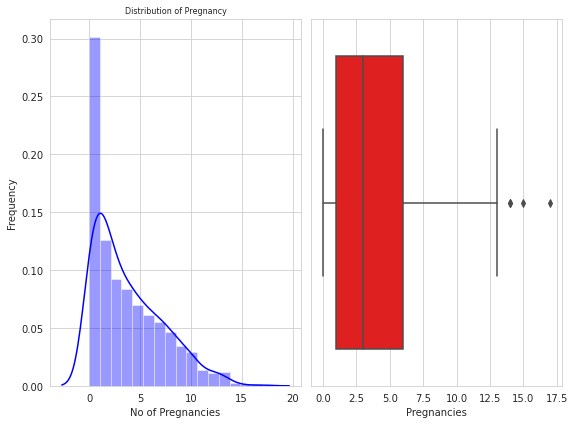

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=diabetes_data,ax=axes[1],orient = 'v', color='r')
plt.tight_layout()


## TASK-1 : 
## Find out the "Correlation" between the different attributes present in the data.
## Also plot a heatmap (refer Seaborn documentation) for the correlation values obtained.

Task 1 and Task 2 are given below

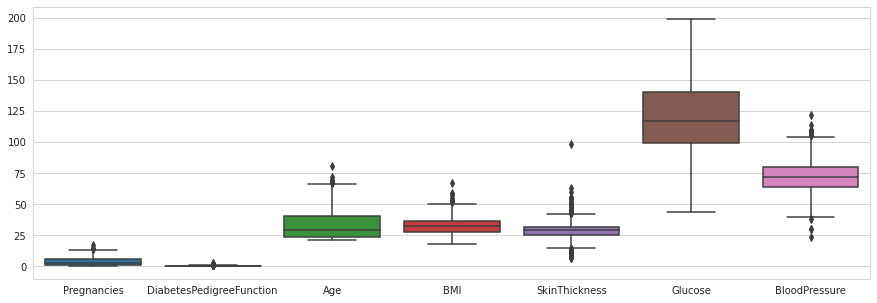

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.boxplot(data=diabetes_data.loc[:, ['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'BMI', 'SkinThickness', 'Glucose', 'BloodPressure']])
plt.show()

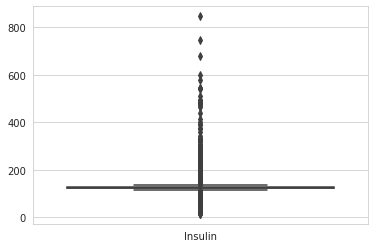

In [ ]:
sns.boxplot(data=diabetes_data.loc[:, ['Insulin']])

**from the above two box plots**:

Age, BMI, skinthickness, bloodpressure and insulin features have outliers



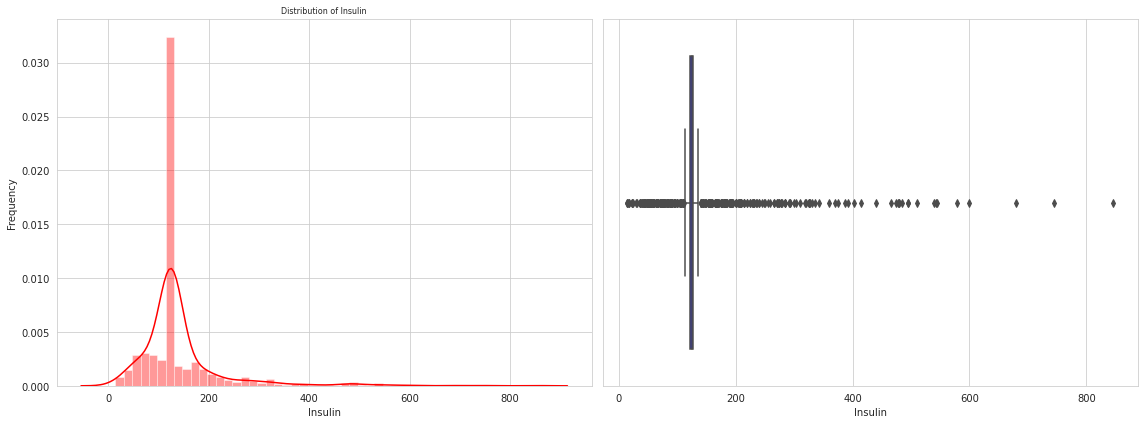

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (16,6))

plot00=sns.distplot(diabetes_data['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=diabetes_data,ax=axes[1],orient = 'v', color='b')
plt.tight_layout()


**From the above box and distribution plots of insulin**

there is a high peak after value 100.

Also, insuline level should be in the range: 30-230
in this diabetes dataset the minimum was 14 and maximum was 846

Insulin attribute has many outliers 

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

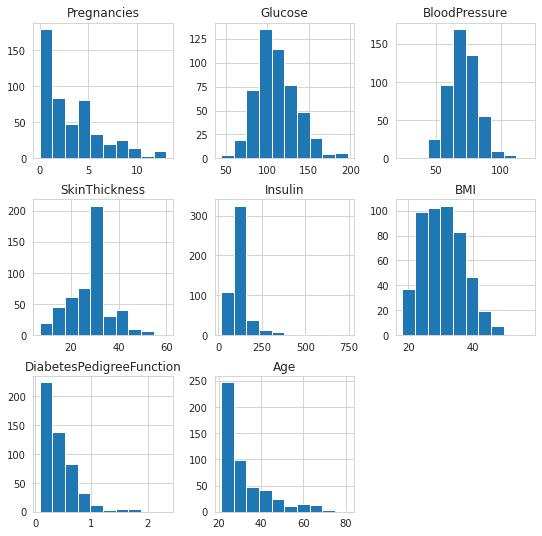

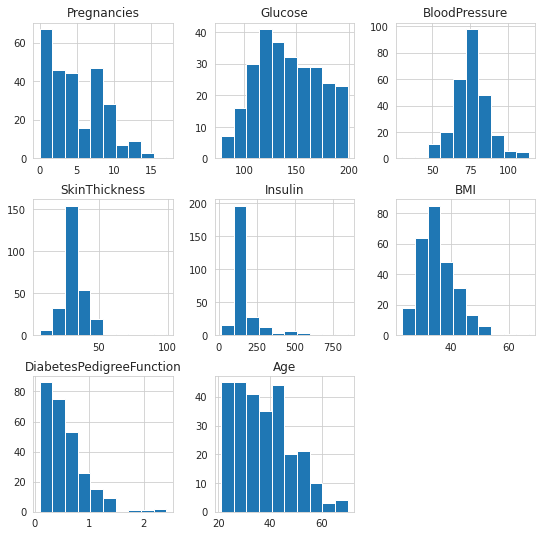

In [ ]:
# Find out the "Correlation" between the different attributes present in the data.

diabetes_data.groupby('Outcome').hist(figsize=(9, 9))



**Observation from the above plot groupby the dependent variable:** 

High Glucose levels, and reduced skin thickness are very significant in diabetes patients

There is a sampling bias in the age, the most of controls fall in the age group 20s, where as in the cases there are more observations between 20 to 45 age group.

Also reduced BMI is observed in the diabetic patients due to the disease whereas in the controls their BMIs are higher between age 20 to 35 age


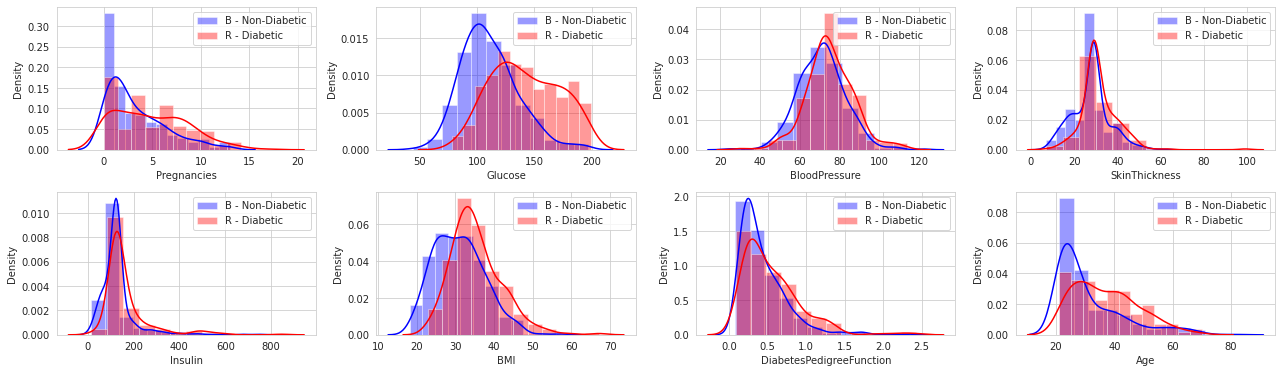

In [ ]:
features_mean= list(diabetes_data.columns[0:8])

bins = 12
plt.figure(figsize=(18,10))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 4, i+1)
    
    sns.distplot(diabetes_data[diabetes_data['Outcome']== 0][feature], bins=bins, color='blue', label='B - Non-Diabetic');
    sns.distplot(diabetes_data[diabetes_data['Outcome']== 1][feature], bins=bins, color='red', label='R - Diabetic');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Observation from the distribution plot**

From the above distribution plot it is obvious that features: Glucose, BMI, Age, Blood pressure are very significantly evident factors among the diabetes when compared to healthy individuals. 

There is also clear evidence of biasness in the age between cases and controls. May be this age biasness can affect all other features too. For example: under feature pregnancies - young people can have 0 as its value. As well as their blood pressure would be also under control, which may not have elevated at the young age. This type of age distribution observed amoung the healthy individuals will definitely affect it dependent features like blood pressure and pregnancies.

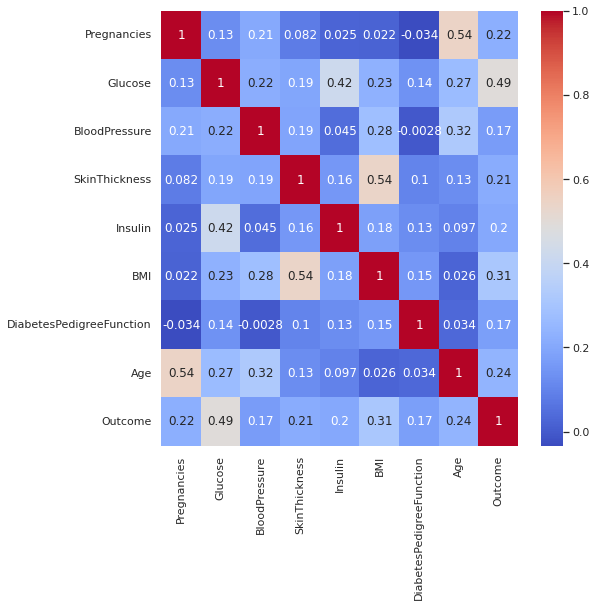

In [ ]:
# heatmap (refer Seaborn documentation) for the correlation values obtained - TASK2
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
g=sns.heatmap(diabetes_data.corr(),annot=True,cmap="coolwarm")

**My observation from the heatmap**

1. there is a positive correlation between age and pregnancies - 0.54
2. there is a negative correlation between diabetes pedigree function and 
blood pressure -> -0.0028
3. when BMI increases, the Skinthickness also increases - correlation value (0.54).
4. Glucose level is directly propotional to the outcome (diabetic or non diabetic) having high correlational index of 0.49

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

* From the correlation map you just obtained above, it seems that Insulin is highly correlated with Glucose (about 0.58), BMI (about 0.23) and Age (about 0.22). It means that as the values of glucose, BMI and Age increase, the insulin is also increasing. It seems logical also that overweight and elderly people might have a higher level of insulin in their bodies.  

* In the same way SkinThickness is highly correlated with BMI (about 0.65).

## Checking  if the data is balanced or imbalanced

We can produce a seaborn count plot to check if the output is dominated by one of the classes or not.

0    500
1    268
Name: Outcome, dtype: int64


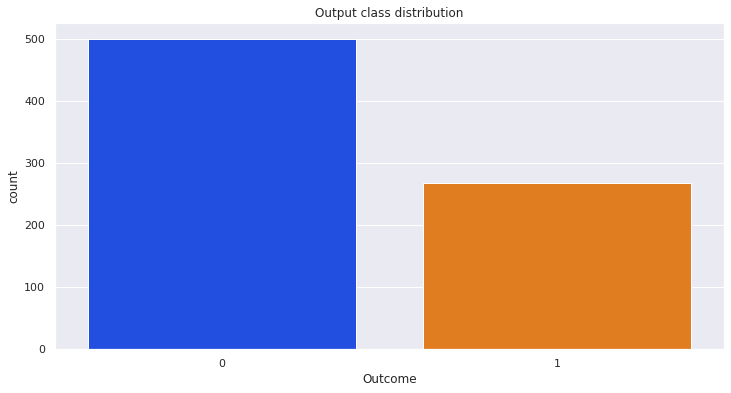

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A total of 768 women were registered in the database. 268 women had diabetes, while 500 women did not have diabetes. 

The above graph shows that the dataset is biased towards non-diabetic people. The number of non-diabetic people is almost twice the number of diabetic patients.

## Scatter matrix of data

A pair-plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

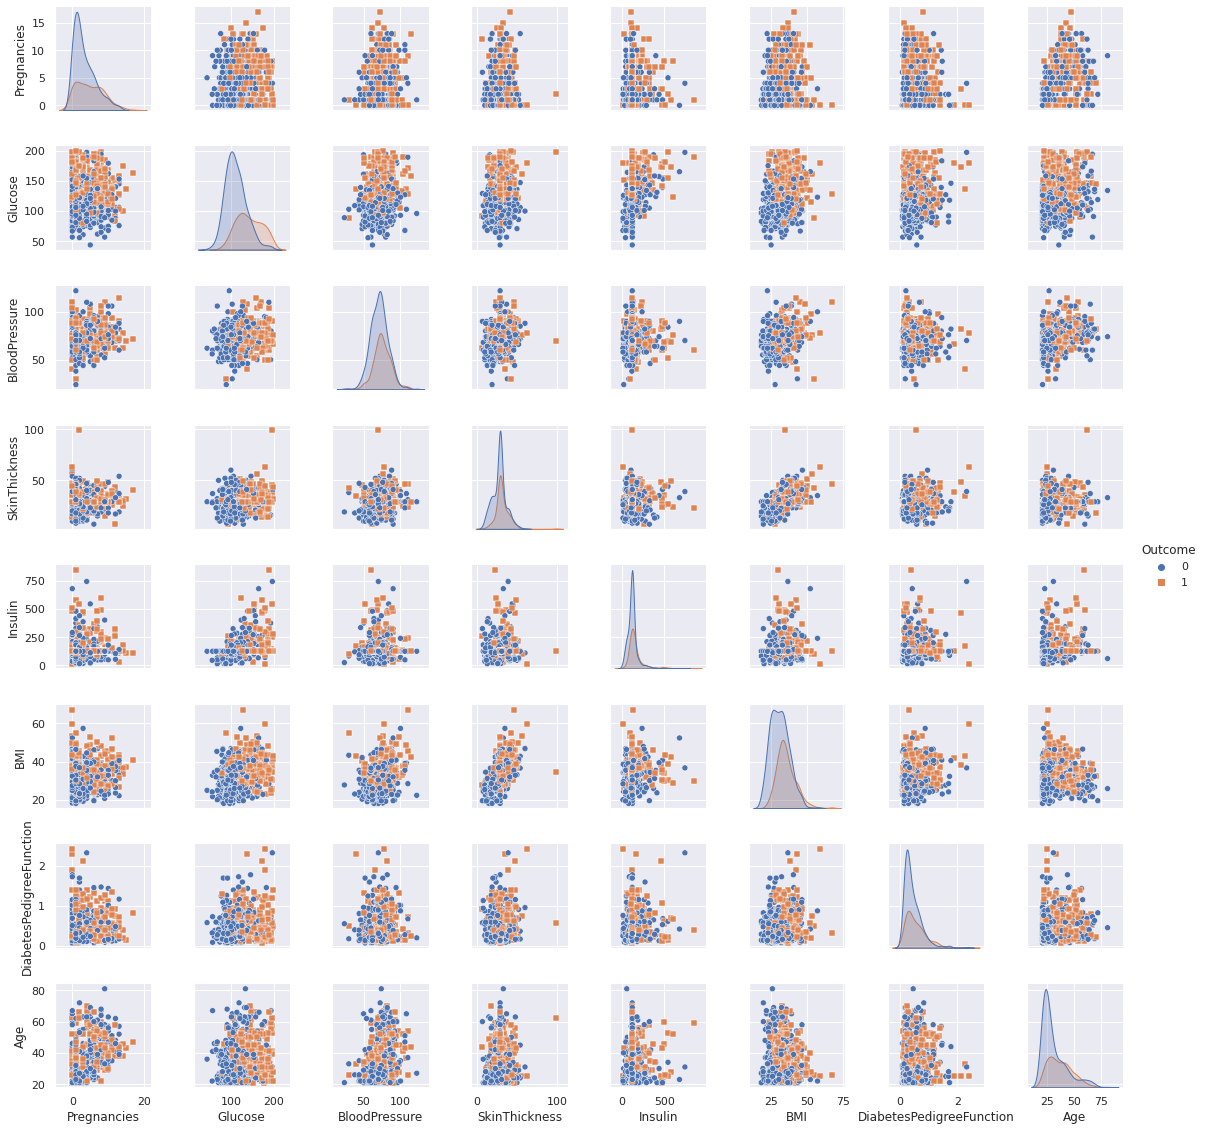

In [ ]:
## TASK-2: Display a pairplot using Seaborn for the diabetes dataset, with the 'outcome' as the hue. 

sns.pairplot(diabetes_data, hue ='Outcome', height=2.0,  markers=["o", "s"])
plt.show()
  


## BMI vs Outcome

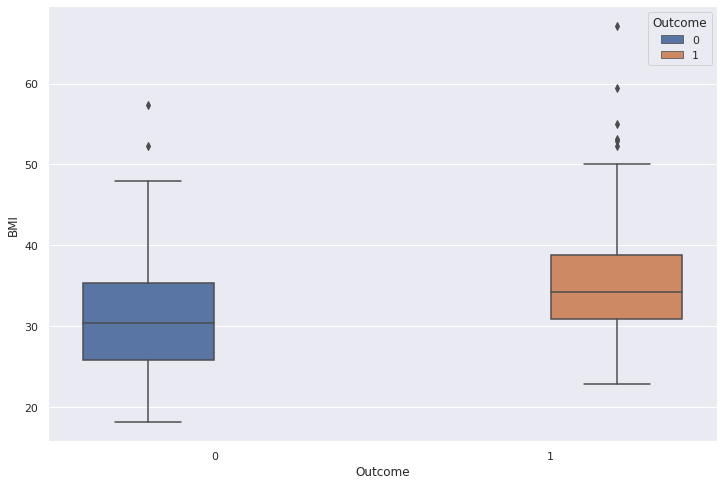

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

It is surprising that the median BMI does not significanty change as the number of pregnancies increases. Those who tested positive for diabetes had higher BMIs than those who did not. However,there is not a very large difference between the medians.

BMI might be higher for women who have had more numbers of pregnancies as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

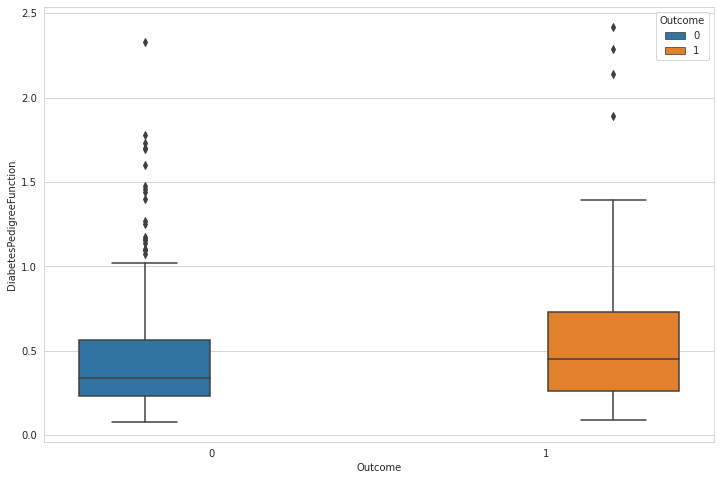

In [ ]:
## TASK-3: Display a boxplot between the Pedigree function and Diabetes.

plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=diabetes_data, hue='Outcome')

**Observation 1**
Diabetes females have strong family history of diabetes than then healthy individuals 

## Pedigree function vs Diabetes 

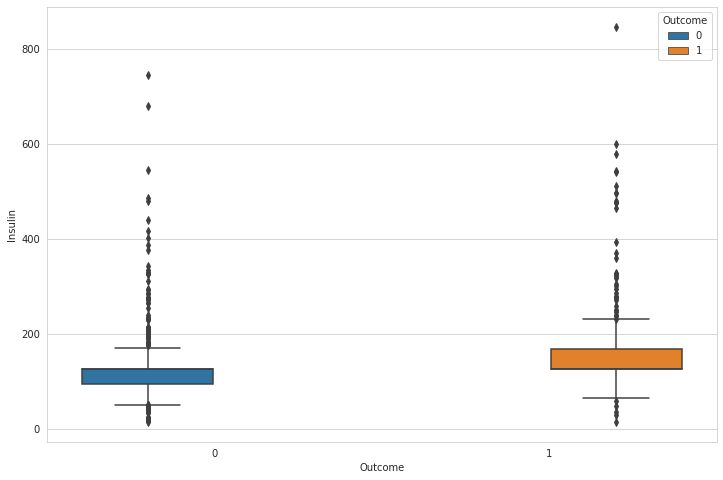

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Insulin',data=diabetes_data, hue='Outcome')

**Observation 2**

Diabetes patients Insulin levels are high than the non diabetic individuals

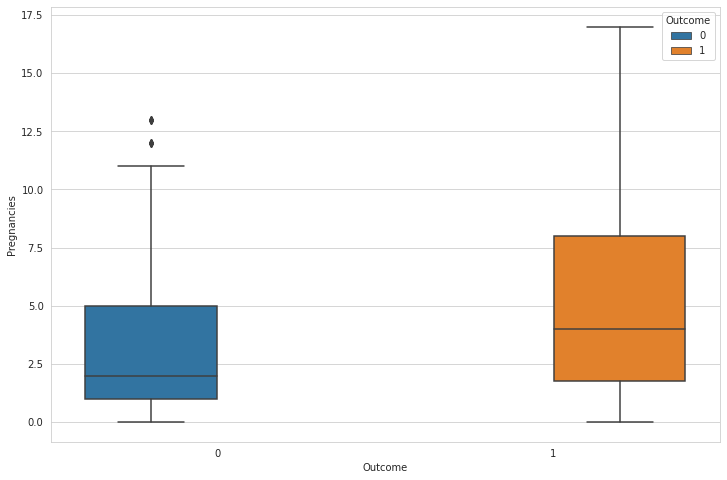

In [ ]:
## TASK-4: Display a boxplot between the number of Pregnancies and Diabetes.

plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Pregnancies',data=diabetes_data, hue='Outcome')

**Observations from Task 4**
Graph shows that number of pregnancies are more for diabetic patients when compared to healthy individuals.

This may be due to there is biasness in the age, there are many young individuals in the healthy controls so this could have affected the pregnancies as well.

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>
This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to have lower pedigree functions than those who tested positive. This indicates that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The average number of pregnancies is higher (4.9) in diabetic as compared to (3.3) non-diabetic women.

## Pregnancy vs Diabetes

## Prevalence of Diabetes vs BMI

Let's try to find out the prevalence of diabetes and its relation to their BMI. Please note that the range of normal BMI is 18.5 to 25.

In [ ]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

0    101
1      7
Name: Outcome, dtype: int64

In [ ]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

0    399
1    261
Name: Outcome, dtype: int64

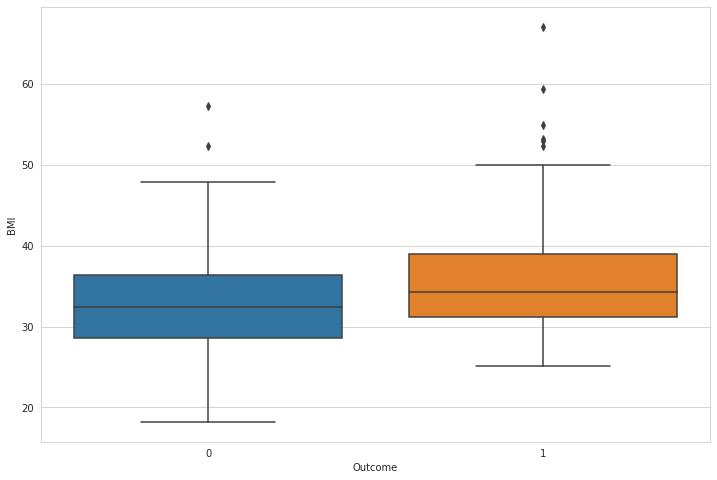

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The Body Mass Index (BMI) shows a significant association with the occurrence of diabetes.  
The interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative. 


**BMI Observation 1**

There are 399 individuals fall under not normal BMI under the non diabetic category whereas only 261 individuals fall under the diabetic category who were having not normal BMI. 

In this case, more observations were having not normal BMI were healthy controls this may be because of the age, their age group should be less than 30 years.

Thus, BMI shows a contradictory result due to the biasness in the age. 

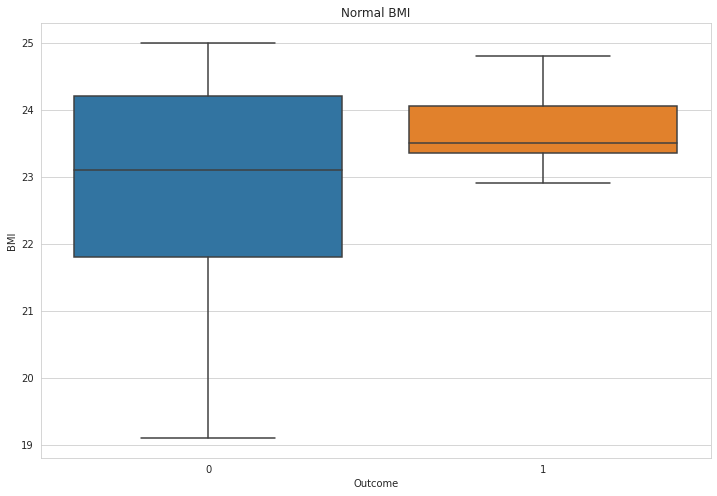

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Normal BMI")
sns.boxplot(x='Outcome', y='BMI',data=normalBMIData)

**BMI Observation 2**

only 7 observations in the diabetes samples have normal BMI, but 101 observations fall under normal BMI under the healthy individual category



## Age vs Diabetes

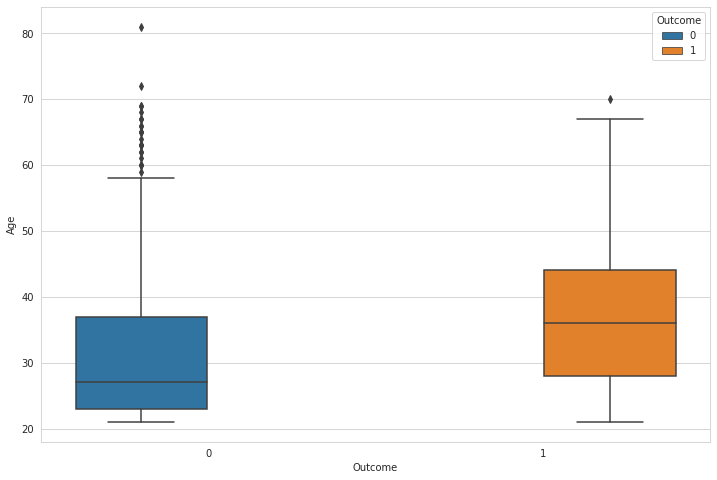

In [ ]:
## TASK-5: Display a boxplot between Age and Diabetes.

plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Age',data=diabetes_data, hue='Outcome')


**Observation from TASK-5**

From the boxplot of Age Vs outcome, the median value of controls is around 27 years whereas the median value of the cases is around 37. It is well known that diabetes is a lifestyle disease and it is mostly diagnosed in the middle aged women aged around 35 and above. Due to the biasness in this feature it is very difficult to conclue the age is one of the factor to cause diabetic.

Moreover, we have high number of healthy controls than the diabetic cases.

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A significant relation can be seen between the age distribution and occurrence of diabetes. Women at age group > 31 years were at higher risk of getting diabetes in comparison to the younger age group.

# The Importance of Standardizing Data

In [ ]:
unchanged_data = diabetes_data.drop('Outcome',axis=1)

In [ ]:
unchanged_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,125,33.6,0.627,50
1,1,85.0,66.0,29,125,26.6,0.351,31
2,8,183.0,64.0,29,125,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63
764,2,122.0,70.0,27,125,36.8,0.340,27
765,5,121.0,72.0,23,112,26.2,0.245,30
766,1,126.0,60.0,29,125,30.1,0.349,47


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

*Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.*

In [ ]:
##########################
##########################

## TASK-6 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################


def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
  X_train, X_test, y_train, y_test =  train_test_split(xdata, ydata, test_size=0.33, random_state=0) ## Write your code here (expected lines ~ 1)
  
  for i in range(1,40):
      ## [REQUIRED] Complete the code in the next three lines
      knn = KNeighborsClassifier(n_neighbors = i)## Write your code here. Initialize the KNN classifier with 'i' neighbours (expected lines ~ 1)
      ## Write your code here. Fit the KNN model on the training set (expected lines ~ 1)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test) ## Write your code here. Make predictions on the test set using KNN (expected lines ~ 1)
      
      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores

In [ ]:
#@title Answer to Task-6. Refer to and run this only if you are unable to complete the task in the previous cell.
def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)
  
  for i in range(1,40):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)
      
      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores


Max train score 100.0 % and k = [1]

Max test score 77.16535433070865 % and k = [20]


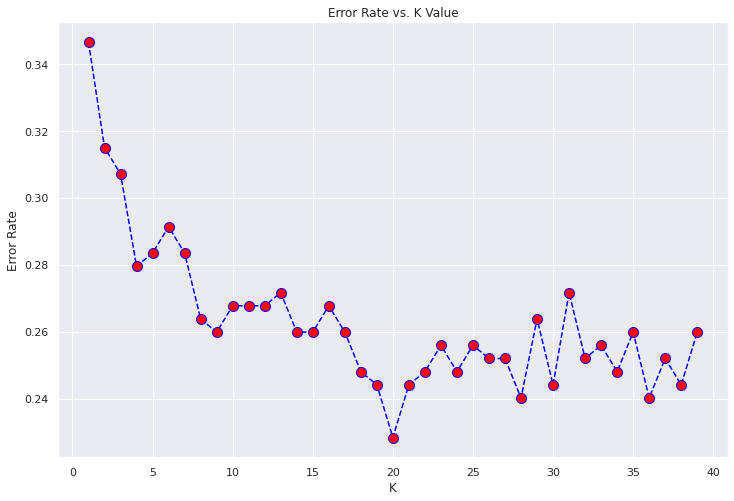

In [ ]:
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])

## Standardize the Variables
Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1. 

$$ Z = {X - \mu \over \sigma}$$ 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler()

In [ ]:
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))


In [ ]:
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496



Max train score 100.0 % and k = [1]

Max test score 77.55905511811024 % and k = [9]


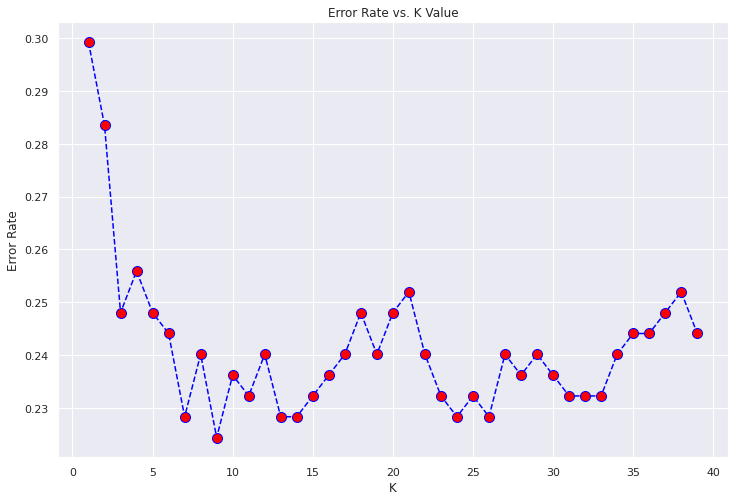

In [ ]:
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])

In [ ]:
for i in range (len(unchanged_test_scores)):
  print ('Unchanged - ', unchanged_test_scores[i], 'Scaled - ', scaled_test_scores[i])


Unchanged -  0.6535433070866141 Scaled -  0.7007874015748031
Unchanged -  0.6850393700787402 Scaled -  0.7165354330708661
Unchanged -  0.6929133858267716 Scaled -  0.7519685039370079
Unchanged -  0.7204724409448819 Scaled -  0.7440944881889764
Unchanged -  0.7165354330708661 Scaled -  0.7519685039370079
Unchanged -  0.7086614173228346 Scaled -  0.7559055118110236
Unchanged -  0.7165354330708661 Scaled -  0.7716535433070866
Unchanged -  0.7362204724409449 Scaled -  0.7598425196850394
Unchanged -  0.7401574803149606 Scaled -  0.7755905511811023
Unchanged -  0.7322834645669292 Scaled -  0.7637795275590551
Unchanged -  0.7322834645669292 Scaled -  0.7677165354330708
Unchanged -  0.7322834645669292 Scaled -  0.7598425196850394
Unchanged -  0.7283464566929134 Scaled -  0.7716535433070866
Unchanged -  0.7401574803149606 Scaled -  0.7716535433070866
Unchanged -  0.7401574803149606 Scaled -  0.7677165354330708
Unchanged -  0.7322834645669292 Scaled -  0.7637795275590551
Unchanged -  0.740157480

## Comparing Accuracy before and after Standardization

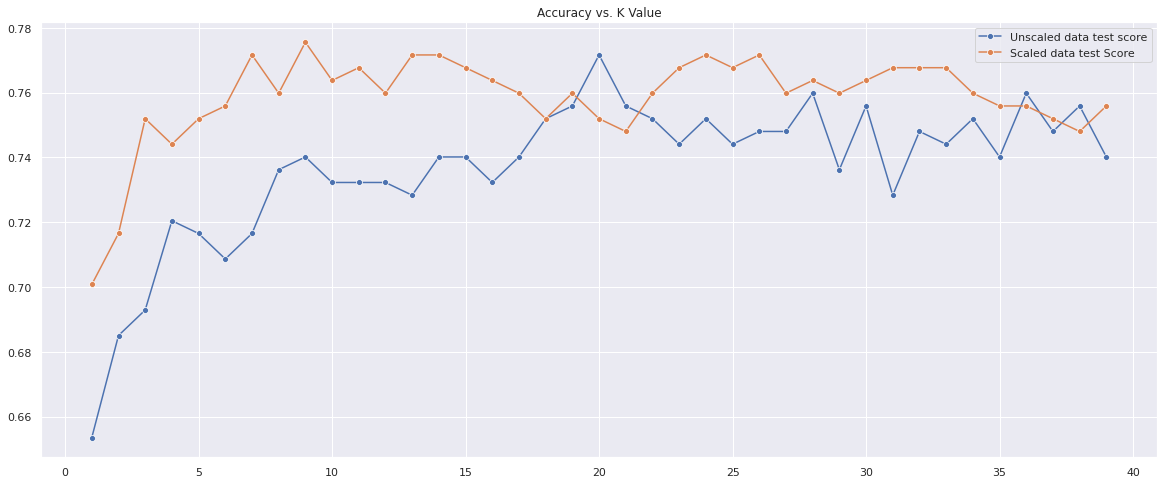

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(range(1,40),unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(range(1,40),scaled_test_scores,marker='o',label='Scaled data test Score')

In [ ]:
## TASK-7: Refer to MinMax Scaler provided in scikit-learn.  
## Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

from sklearn.preprocessing import MinMaxScaler
scalermm = MinMaxScaler()
scaledmm = scalermm.fit_transform(diabetes_data.drop('Outcome',axis=1))




Max train score 100.0 % and k = [1]

Max test score 77.16535433070865 % and k = [26]


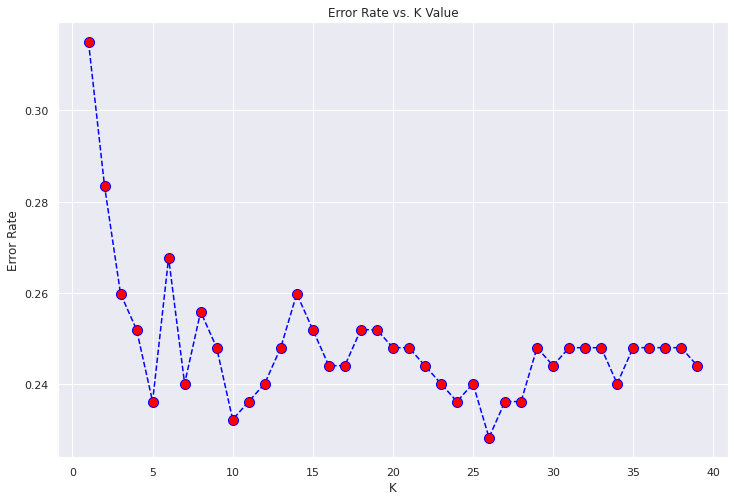

In [ ]:
scaledmm_test_scores = plot_KNN_error_rate(scaledmm, diabetes_data['Outcome'])

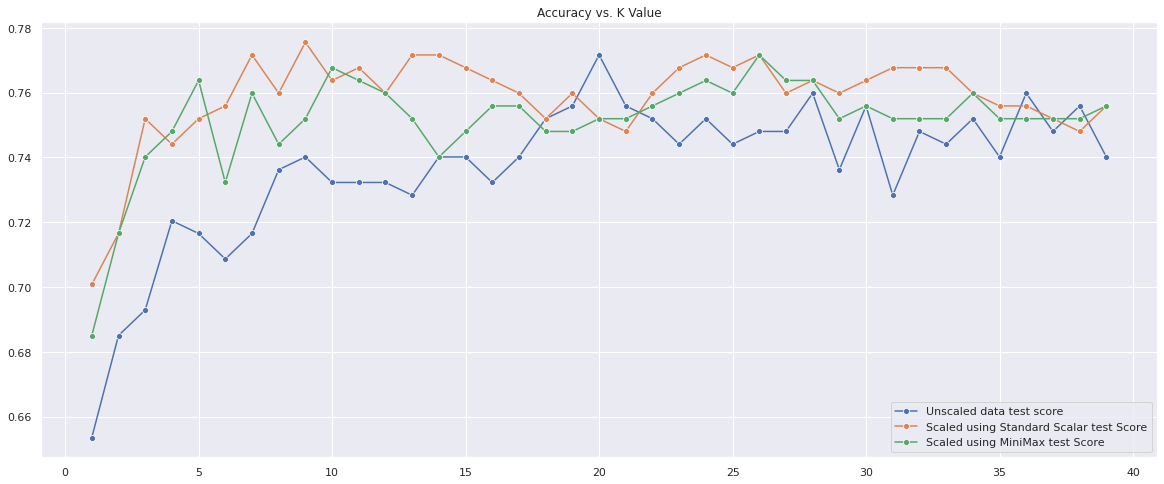

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(range(1,40),unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(range(1,40),scaled_test_scores,marker='o',label='Scaled using Standard Scalar test Score')
sns.lineplot(range(1,40),scaledmm_test_scores,marker='o',label='Scaled using MiniMax test Score')

In [ ]:
X = diabetes_data.drop('Outcome',axis=1)
y= diabetes_data['Outcome']

In [ ]:
X.shape

(768, 8)

In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
## TASK-8: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.
# CV on Minimax scaled data

from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X_scaleddf = pd.DataFrame(data = scaledmm, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaleddf, y, test_size = 0.33, random_state = 17)
# on scaled data

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
acc = metrics.accuracy_score(y_test, predicted)
print('KNN accuracy without Cross Validation = ' + str(acc * 100) + '%')

scores = cross_val_score(knn, X_train, y_train, cv=3)
print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print("Cross Validation Scores:", scores)

KNN accuracy without Cross Validation = 77.95275590551181%
Cross Validation Accuracy: 0.75
Cross Validation Scores: [0.72674419 0.76023392 0.77777778]


In [ ]:
X_scaleddf = pd.DataFrame(data = scaledmm, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaleddf, y, test_size = 0.33, random_state = 9)
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist)) 

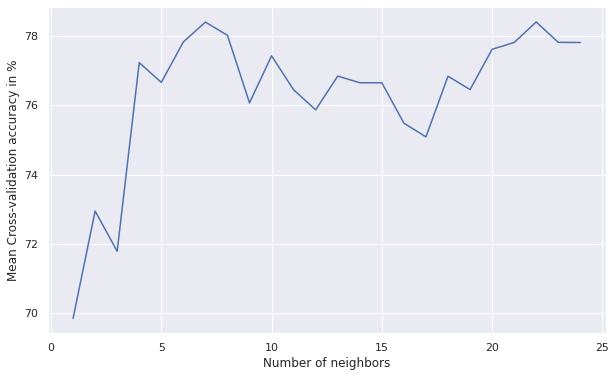

In [ ]:
Accuracy = [x*100 for x in cv_scores]
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [ ]:
# Stratified CV on Standard Scaled Data

from sklearn.model_selection import StratifiedKFold
from statistics import mean

scaled_data

X_scaleddf = pd.DataFrame(data = scaled_data, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaleddf, y, test_size = 0.33, random_state = 9)

skf = StratifiedKFold(n_splits=10)
cv_scoresskf = []
neighborsskf = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighborsskf.append(k)
  acclistskf = []
  for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclistskf.append(knn.score(x_test_fold, y_test_fold))
  cv_scoresskf.append(mean(acclistskf))

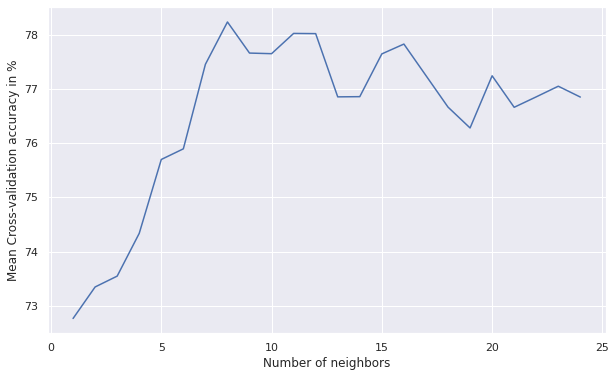

In [ ]:
Accuracy = [x*100 for x in cv_scoresskf]
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighborsskf, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

# Conclusion

From the data analysis we carried out, it seems that there is some form of an association between BMI, number of pregnancies, pedigree function, and the test results for diabetes.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

The diabetes dataset is an imbalanced, so had applied stratified cross validation to preserve the percentage of classes in the splits. The accuracy was better achieved.

# References

https://www.kaggle.com/dktalaicha/diabetes-prediction-by-knn